In [49]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pickle
import time
import plotly.express as px
from plotly.offline import init_notebook_mode
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import mean_absolute_error
from sklearn.svm import SVC
from sklearn.linear_model import LinearRegression, Lasso, Ridge
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
import warnings
warnings.filterwarnings("ignore")
init_notebook_mode(connected=True)

In [28]:
calories = pd.read_csv("calories.csv")
exercises = pd.read_csv("exercise.csv")
df = pd.merge(exercises, calories, how="inner")

In [ ]:
df.head()

In [30]:
df.shape

(15000, 9)

In [ ]:
df.info()

In [ ]:
df.describe()

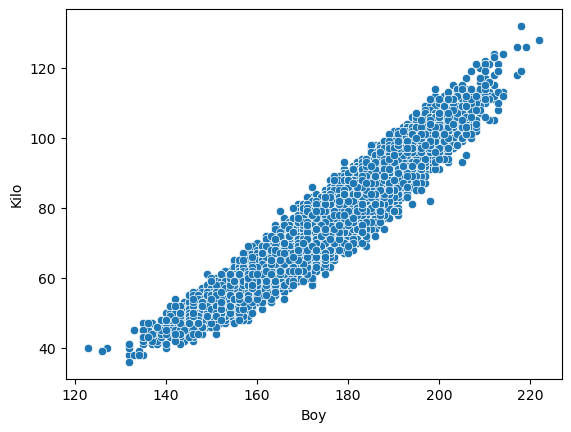

In [33]:
plt.figure()
sns.scatterplot(x=df["Height"], y=df["Weight"])
plt.xlabel("Boy")
plt.ylabel("Kilo")
plt.show()

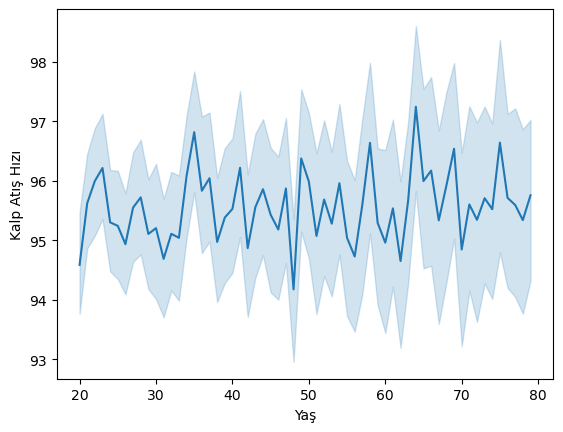

In [34]:
plt.figure()
sns.lineplot(x=df["Age"], y=df["Heart_Rate"])
plt.xlabel("Yaş")
plt.ylabel("Kalp Atış Hızı")
plt.show()

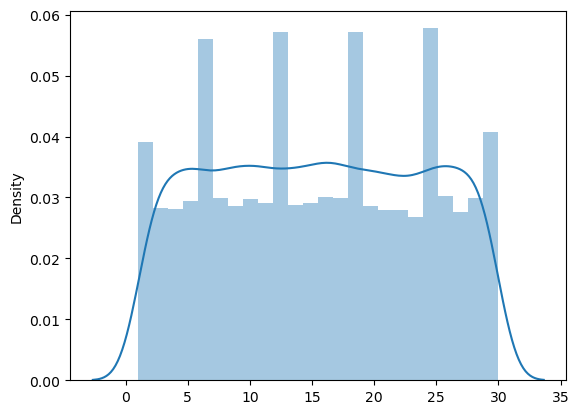

In [35]:
plt.figure()
sns.distplot(x=df["Duration"])
plt.show()

In [36]:
genders = df["Gender"].value_counts()

values = genders.values
names = genders.index

fig = px.pie(df, values=values, names=names, hole=0.5)
fig.show()

In [37]:
df["Gender"] = df["Gender"].map({
    "male": 0, "female": 1
})

In [ ]:
df.head()

In [ ]:
plt.figure()
sns.heatmap(df.corr() > 0.9, annot=True, cbar=False)
plt.show()

In [40]:
ndf = df.drop(["User_ID", "Duration", "Weight"], axis=1)

In [41]:
X = ndf.drop(["Calories"], axis=1)
y = ndf["Calories"]

In [42]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=4242)

In [43]:
X_train.shape, X_test.shape

((12000, 5), (3000, 5))

In [44]:
y_train.shape, y_test.shape

((12000,), (3000,))

In [45]:
ss = StandardScaler()
X_train = ss.fit_transform(X_train)
X_test = ss.transform(X_test)

In [50]:
models = {
    "Linear Regression": LinearRegression(),
    "Lasso": Lasso(),
    "Ridge": Ridge(),
    "XGBoost": XGBRegressor(),
    "Random Forest": RandomForestRegressor()
}

In [58]:
for i, val in models.items():
    print("*****" + i + "*****")
    models[i].fit(X_train, y_train)
    y_pred = models[i].predict(X_test)
    print("MAE: ", mean_absolute_error(y_test, y_pred))

*****Linear Regression*****
MAE:  18.065976820717
*****Lasso*****
MAE:  18.102578983717397
*****Ridge*****
MAE:  18.065976191425612
*****XGBoost*****
MAE:  11.100719812954466
*****Random Forest*****
MAE:  11.166279190476192


In [59]:
xgb_model = XGBRegressor()
xgb_model.fit(X_train, y_train)

XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [60]:
pickle.dump(xgb_model, open("xgb.pkl", "wb"))

In [61]:
pickle.dump(ss, open("ss.pkl", "wb"))